# Importing the Dataset and Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dataset = pd.read_csv("../../../Data/Mice Data/data_after_mice_1.csv",header=0,encoding='utf-8')
df = dataset.copy()

# Features, Labels and Converting Data to Arrays

In [3]:
# We Choose Features that were given as Significant from Lasso-CV Feature Selection Algorithm

selected_features = ['grade_C','grade_D','grade_E',
                     'grade_F','grade_G','total_rec_int',
                     'total_pymnt_inv','funded_amnt_inv','sub_grade_B5',
                     'sub_grade_B4','sub_grade_C5','sub_grade_C4',
                     'sub_grade_C3','sub_grade_D5','int_rate']

features = df[selected_features]

In [4]:
# Converting Dataframes to Individual Arrays of Features and Labels to Fit to a Model
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['int_rate'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('int_rate', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [5]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Testing Features Shape:', test_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (665456, 14)
Testing Features Shape: (221819, 14)
Training Labels Shape: (665456,)
Testing Labels Shape: (221819,)


# Generate an Evaluation Function to Run the Model

In [6]:
def evaluate(model,X_train,X_test,Y_train,Y_test):
    
    model.fit(X_train,Y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    
    errors_train = abs(predictions_train - Y_train)
    errors_test = abs(predictions_test - Y_test)
    
    mape_train = 100 * np.mean(errors_train / Y_train)
    mape_test = 100 * np.mean(errors_test / Y_test)
    
    accuracy_train = 100 - mape_train
    accuracy_test = 100 - mape_test
    print('Model Performance')
    print('Average Error(Train Data): {:0.4f} of int rate.'.format(np.mean(errors_train)))
    print('Average Error(Test Data): {:0.4f} of int rate.'.format(np.mean(errors_test)))
    
    print('Accuracy(Train Data) = {:0.2f}%.'.format(accuracy_train))
    print('Accuracy(Test Data) = {:0.2f}%.'.format(accuracy_test))
    
    print('Mape(Train Data): {:0.4f} of int rate'.format(mape_train))
    print('Mape(Test Data): {:0.4f} of int rate'.format(mape_test))
    
    plt.figure(figsize = (10,10))
    plt.scatter(predictions_train,(predictions_train - Y_train),c='g',s=40,alpha=0.5)
    plt.scatter(predictions_test,(predictions_test - Y_test),c='b',s=40,alpha=0.5)
    plt.hlines(y=0,xmin=0,xmax=30)
    plt.title('residual plot blue(test) and green(train)data')
    plt.ylabel('residuals')
    return accuracy_train,accuracy_test

# Importing the Model and Providing the Necessary Parameters

Model Performance
Average Error(Train Data): 0.1535 of int rate.
Average Error(Test Data): 0.3821 of int rate.
Accuracy(Train Data) = 98.68%.
Accuracy(Test Data) = 96.76%.
Mape(Train Data): 1.3202 of int rate
Mape(Test Data): 3.2373 of int rate


(98.67982473155833, 96.76270556200329)

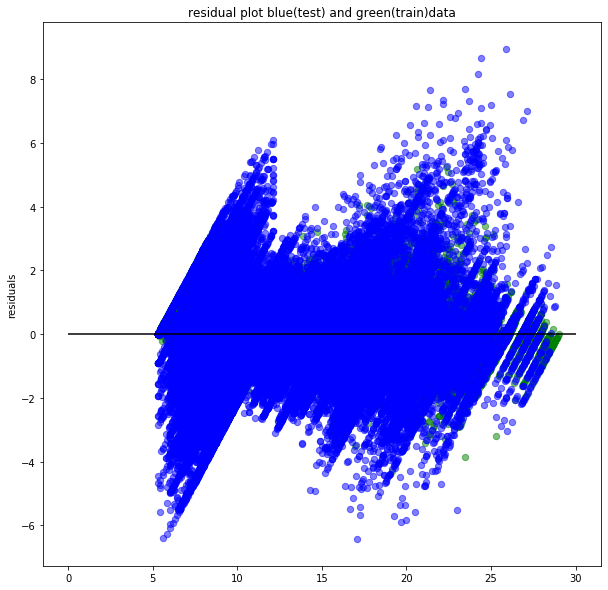

In [7]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model (Using Default 10 Estimators)
rf = RandomForestRegressor(n_estimators= 10, random_state=42)

# Using Evaluation Function on our First Model

evaluate(rf, train_features, test_features, train_labels, test_labels)

# Variable Importance

In [8]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: grade_D              Importance: 0.2
Variable: grade_E              Importance: 0.2
Variable: grade_F              Importance: 0.2
Variable: grade_C              Importance: 0.16
Variable: grade_G              Importance: 0.08
Variable: total_rec_int        Importance: 0.04
Variable: total_pymnt_inv      Importance: 0.04
Variable: sub_grade_B4         Importance: 0.03
Variable: funded_amnt_inv      Importance: 0.02
Variable: sub_grade_B5         Importance: 0.02
Variable: sub_grade_C5         Importance: 0.01
Variable: sub_grade_C4         Importance: 0.0
Variable: sub_grade_C3         Importance: 0.0
Variable: sub_grade_D5         Importance: 0.0


# Implementing Model With the Most Important Features

Model Performance
Average Error(Train Data): 0.1654 of int rate.
Average Error(Test Data): 0.4097 of int rate.
Accuracy(Train Data) = 98.60%.
Accuracy(Test Data) = 96.57%.
Mape(Train Data): 1.4018 of int rate
Mape(Test Data): 3.4256 of int rate


(98.59820389650392, 96.57443836658773)

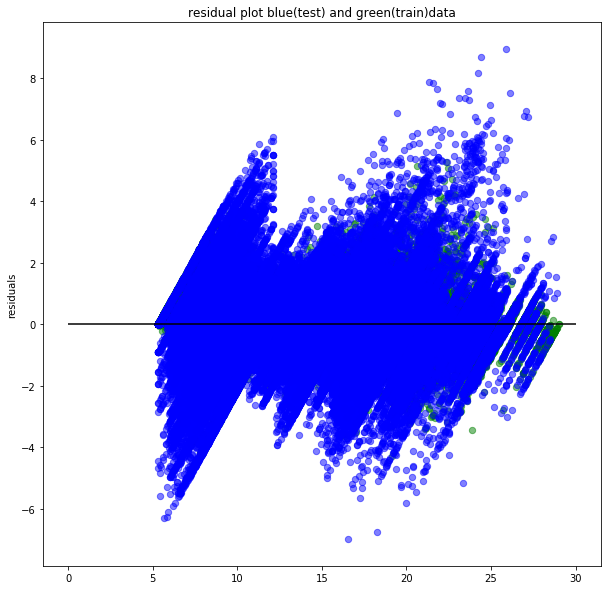

In [9]:
# New random forest with only the most important variables (Default 10 Estimators)

rf_most_important = RandomForestRegressor(n_estimators= 10, random_state=42)

# Extract the most important features

important_indices = [feature_list.index('grade_D'), feature_list.index('grade_E'), feature_list.index('grade_F'),
                     feature_list.index('grade_C'), feature_list.index('grade_G'), feature_list.index('total_rec_int'),
                     feature_list.index('total_pymnt_inv'), feature_list.index('funded_amnt_inv'),
                     feature_list.index('sub_grade_B4'),feature_list.index('sub_grade_B5'),feature_list.index('sub_grade_C5')]

train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

#Evaluating the Model again with Best Features

evaluate(rf_most_important,train_important,test_important,train_labels,test_labels)

# Examine the Default Random Forest to Determine Parameters

In [10]:
rf = RandomForestRegressor(n_estimators=10, random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


# Random Search [Grid] With Cross Validation

In [11]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [10,20,30,50,100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 30, 50, 100]}


In [12]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(train_features, train_labels);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 30.0min finished


In [13]:
rf_random.best_params_

{'n_estimators': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [14]:
rf_random.cv_results_

{'mean_fit_time': array([  30.99120283, 1154.61550488,   21.39064217,   63.8884953 ,
         592.21293006,  150.79135461,  189.81137009,   31.74571862,
         305.10437617,   50.19037757]),
 'std_fit_time': array([ 0.86223446,  7.103474  ,  0.54735437,  1.45767258, 16.88313049,
        21.60757567,  4.27286203,  1.92179004,  1.62325115,  3.40413511]),
 'mean_score_time': array([ 1.42978044, 11.81397338,  0.27913198,  0.27247782,  9.57467585,
         2.94529586,  3.93739381,  1.31010499,  3.70435848,  1.72333331]),
 'std_score_time': array([0.07860152, 0.45920591, 0.04505195, 0.02516315, 1.5978082 ,
        0.70145344, 0.28028928, 0.08334373, 0.49294528, 0.49864277]),
 'param_n_estimators': masked_array(data=[10, 100, 10, 10, 50, 20, 50, 10, 30, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[5, 2, 5, 2, 2, 2, 5, 2, 10

Model Performance
Average Error(Train Data): 0.2236 of int rate.
Average Error(Test Data): 0.4052 of int rate.
Accuracy(Train Data) = 98.10%.
Accuracy(Test Data) = 96.61%.
Mape(Train Data): 1.8975 of int rate
Mape(Test Data): 3.3915 of int rate


(98.10252946935391, 96.60846330773425)

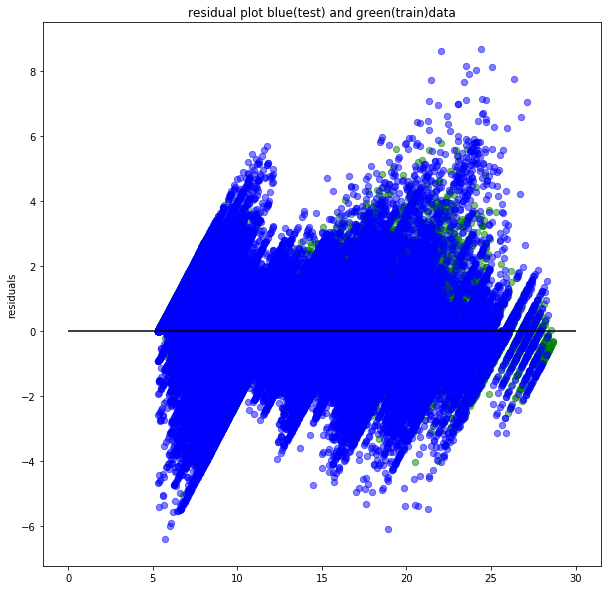

In [15]:
# Evaluate the Random Forest Model wil the Best Parameters

rf_best = RandomForestRegressor(n_estimators= 20,
 min_samples_split=2,
 min_samples_leaf=2,
 max_features='auto',
 max_depth=60,
 bootstrap=True)

evaluate(rf_best,train_important,test_important,train_labels,test_labels)

In [16]:
rf = RandomForestRegressor(n_estimators= 200,random_state=42)

Model Performance
Average Error(Train Data): 0.1429 of int rate.
Average Error(Test Data): 0.3702 of int rate.
Accuracy(Train Data) = 98.76%.
Accuracy(Test Data) = 96.86%.
Mape(Train Data): 1.2362 of int rate
Mape(Test Data): 3.1434 of int rate


(98.76375725811737, 96.85662426511688)

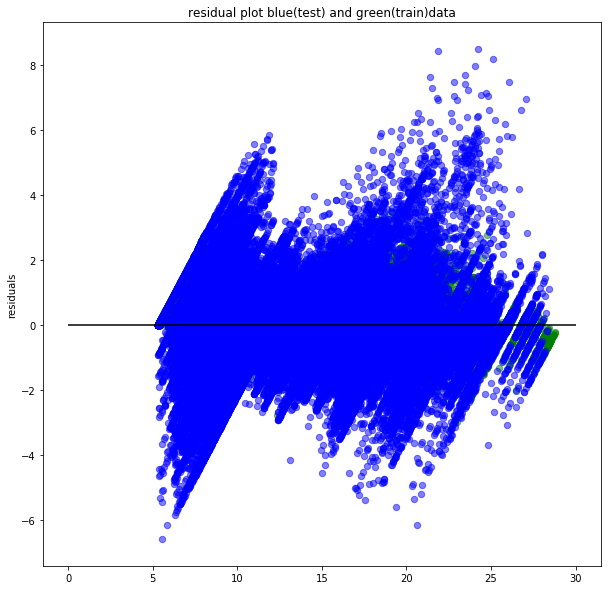

In [17]:
evaluate (rf,train_features,test_features,train_labels,test_labels)